# Project : Investigate TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

TMDB Dataset is from [TMDB API]( https://www.themoviedb.org/documentation/api/terms-of-use). In the dataset, it contains many information about movies such as release date, movie name, cast, director, production company, budget, revenue, audience’s vote…etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set(style = 'darkgrid')

I have some questions want to explore from this dataset:  
1. What's the distribution of vote average ?  
2. Which genres are most popular from year to year ?  
3. How was the total revenue change from year ?  
4. For the Top3 production companies (who produced the most movies), how was its revenue trend from year to year ? And how many movies did they produce each year ?  
5. Did the production company who produced more number of movies would has more revenue ?  
6. Which actor/actress participated in many popular movies (Top10) ?  
7. What kinds of properties are associated with movies that have high revenues ?

<a id='wrangling'></a>
## Data Wrangling

### General Properties
First, read the dataset `tmdb-movies.csv`,then use `head()` to see first five rows of the data to ensure there have no problems when I read dataset.

In [2]:
tmdb_df = pd.read_csv('tmdb-movies.csv')

In [3]:
pd.set_option('display.max_columns', 50)
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


use `shape` function I know in the dataset have **10866 rows and 21 columns**.

In [4]:
tmdb_df.shape

(10866, 21)

Through `dtypes` can know the data type of each column. Among them, I think I have to convert the data type of the **release_date** to datetime in the following.

In [5]:
tmdb_df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Through `info()`, I can see which columns have missing value. Here, I can see the columns **imdb_id, cast, hompage, tagline, keywords, overview, genres and production_companies** have missing value. I will deal with missing values in the next part.

In [6]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

To see if there have duplicated data in the tmdb_df. If there have duplicated data, I am going to drop it.

In [7]:
tmdb_df.duplicated().sum()

1

There is one duplicated data. In the next cell it will be dropped.

In [8]:
# drop the duplicated rows
tmdb_df.drop_duplicates(inplace = True)
tmdb_df.duplicated().sum()

0

See the unique values of each column.

In [9]:
tmdb_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

To see the simple describe statistics about the data.

In [10]:
tmdb_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


According to the simple statistics table, I can discover at least 50% movies have no budget and revenue. And the most strange things is that some movies **runtime** equal to 0. Intuitively this is impossible.  

### Data Cleaning  
In this part I am going to clean the data. Include drop columns and rows, convert data type, create new columns and new dataframe which I need in the following analysis.  
#### Drop columns
First, drop the columns which I don't need. I am going to drop **imdb_id, homepage, tagline, keywords and overview** five columns. Because I don't need the information of these columns and there also have many missing values in them.

In [11]:
tmdb_df.drop(['imdb_id', 'homepage', 'tagline', 'keywords','overview'], axis = 1, inplace = True)
tmdb_df.shape

(10865, 16)

Now, there are **16 columns**.

#### Drop rows
As I know from the firat part, there are some movies' runtime equal to 0. I save the datas which runtime is 0 in a dataframe `no_runtime_df`. There are 31 rows in the data. As these data take a little portion in the whole dataset, I will drop these data from the dataset. Because the movie which runtime equals to zero may have some mistake when collecting data.  
> Maybe there are some better way to deal with these data, for example, search runtime of movies one by one. But it really waste time and not sure can find right information, so I chose to drop them instead of searching their runtime.

In [12]:
no_runtime_df = tmdb_df.query('runtime == 0')
no_runtime_df.shape

(31, 16)

In [13]:
tmdb_df.drop(no_runtime_df.index, axis = 0, inplace = True)

In [14]:
tmdb_df.shape

(10834, 16)

Check if 31 rows are dropped.  
$10865 - 31 = 10834$  
That's right!

#### Convert data type
Convert data type **release_date** to datetime using `to_datetime` function in pandas.

In [15]:
release_date = pd.to_datetime(tmdb_df['release_date'], format = '%m/%d/%y')
tmdb_df['release_date'] = release_date

In [16]:
tmdb_df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### Dealing with missing values
Now in the dataset, there are missing value in **cast, director, genres and production_coompanies**. I will drop the row which with missing value to make the dataset consistent when analysing.  


In [17]:
tmdb_df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  42
runtime                    0
genres                    22
production_companies    1012
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [18]:
tmdb_df.dropna(axis = 0, how = 'any', inplace = True)
tmdb_df.isnull().sum()

id                      0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

#### Create other useful dataset
I am going to create two new dataset base on columns **genres**, **cast** and **production_companies**. `genres_df` will help me in the following when I analysis about movie genres. In addition `cast_df` will useful when I analysis about actor/actress and `production_df` will use for analysis production companies.
##### Create genres_df

In [19]:
genres_df = tmdb_df.copy()

In [20]:
genres_df = genres_df[['release_year', 'genres', 'popularity']]
genres_df.head(3)

,release_year,genres,popularity
0,2015,Action|Adventure|Science Fiction|Thriller,32.985763
1,2015,Action|Adventure|Science Fiction|Thriller,28.419936
2,2015,Adventure|Science Fiction|Thriller,13.112507


I am going to split the row with "|" in genres column into multiple new rows.  
I google ***How to split string entries to seperate rows in pandas dataframe?*** and find the reference [here](https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows).

In [21]:
genres_df = (genres_df.set_index(genres_df.columns.drop('genres', 1).tolist())
 .genres.str.split('|', expand = True)
 .stack()
 .reset_index()
 .rename({0: 'genres'}, axis = 1)
 .loc[:, genres_df.columns]
)

In [22]:
genres_df.head()

,release_year,genres,popularity
0,2015,Action,32.985763
1,2015,Adventure,32.985763
2,2015,Science Fiction,32.985763
3,2015,Thriller,32.985763
4,2015,Action,28.419936


##### Create cast_df

In [23]:
cast_df = tmdb_df.copy()

In [24]:
cast_df = cast_df[['release_year', 'cast', 'popularity']]
cast_df.head(3)

,release_year,cast,popularity
0,2015,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,32.985763
1,2015,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,28.419936
2,2015,Shailene Woodley|Theo James|Kate Winslet|Ansel...,13.112507


I am going to split the row with "|" in cast column into multiple new rows.

In [25]:
cast_df = (cast_df.set_index(cast_df.columns.drop('cast', 1).tolist())
 .cast.str.split('|', expand = True)
 .stack()
 .reset_index()
 .rename({0: 'cast'}, axis = 1)
 .loc[:, cast_df.columns]
)

In [26]:
cast_df.head(3)

,release_year,cast,popularity
0,2015,Chris Pratt,32.985763
1,2015,Bryce Dallas Howard,32.985763
2,2015,Irrfan Khan,32.985763


##### Create production_df

In [27]:
production_df = tmdb_df.copy()

In [28]:
production_df = production_df[['release_year', 'production_companies', 'revenue_adj']]
production_df.head(3)

,release_year,production_companies,revenue_adj
0,2015,Universal Studios|Amblin Entertainment|Legenda...,1.392446e+09
1,2015,Village Roadshow Pictures|Kennedy Miller Produ...,3.481613e+08
2,2015,Summit Entertainment|Mandeville Films|Red Wago...,2.716190e+08


I am going to split the row with "|" in production_companies column into multiple new rows.

In [29]:
production_df = (production_df.set_index(production_df.columns.drop('production_companies', 1).tolist())
 .production_companies.str.split('|', expand = True)
 .stack()
 .reset_index()
 .rename({0: 'production_companies'}, axis = 1)
 .loc[:, production_df.columns]
)

In [30]:
production_df.head(3)

,release_year,production_companies,revenue_adj
0,2015,Universal Studios,1.392446e+09
1,2015,Amblin Entertainment,1.392446e+09
2,2015,Legendary Pictures,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis
> Note: In the following analysis, if need to use revenue, I will use `revenue_adj` instead because it accounting for inflation. I think it's better to use `revenue_adj` than `revenue`.

### Question 1: What's the distribution of vote average ?

In [31]:
tmdb_df['vote_average'].describe()

count    9759.000000
mean        5.964535
std         0.912967
min         1.500000
25%         5.400000
50%         6.000000
75%         6.600000
max         8.700000
Name: vote_average, dtype: float64

The minimum vote average is 1.5, the maximum vote average is 9.2, the median vote average is 6. 

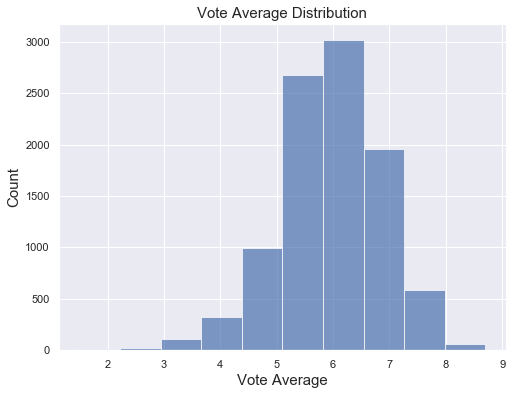

In [32]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.hist(tmdb_df['vote_average'], alpha = .7)
ax.set_title("Vote Average Distribution", fontsize = 15)
ax.set_xlabel('Vote Average', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15);

Look at the distribution of vote average, it's close to normal. Most of movies got vote score at the range 5 to 7. Few movies got very high vote score which greater than 8 and few movies got very low vot score which less than 3.

### Question 2: Which genres are most popular from year to year ?
> Use dataframe `genres_df` which I created before.  

In this question, my definition of popular genres is the genres which frequently occurring the most.  
First, I am going to count each genres' occurrence.

In [33]:
genres_count = genres_df['genres'].value_counts()
genres_count

Drama              4362
Comedy             3429
Thriller           2744
Action             2234
Romance            1568
Horror             1521
Adventure          1383
Crime              1299
Science Fiction    1135
Family             1094
Fantasy             839
Mystery             772
Animation           617
Music               338
Documentary         315
History             306
War                 258
Western             160
TV Movie            130
Foreign             120
Name: genres, dtype: int64

In [34]:
genres_prop = (genres_count/genres_df.shape[0])*100
genres_prop

Drama              17.714425
Comedy             13.925439
Thriller           11.143600
Action              9.072450
Romance             6.367771
Horror              6.176901
Adventure           5.616472
Crime               5.275341
Science Fiction     4.609324
Family              4.442820
Fantasy             3.407245
Mystery             3.135153
Animation           2.505686
Music               1.372645
Documentary         1.279240
History             1.242690
War                 1.047758
Western             0.649773
TV Movie            0.527940
Foreign             0.487329
Name: genres, dtype: float64

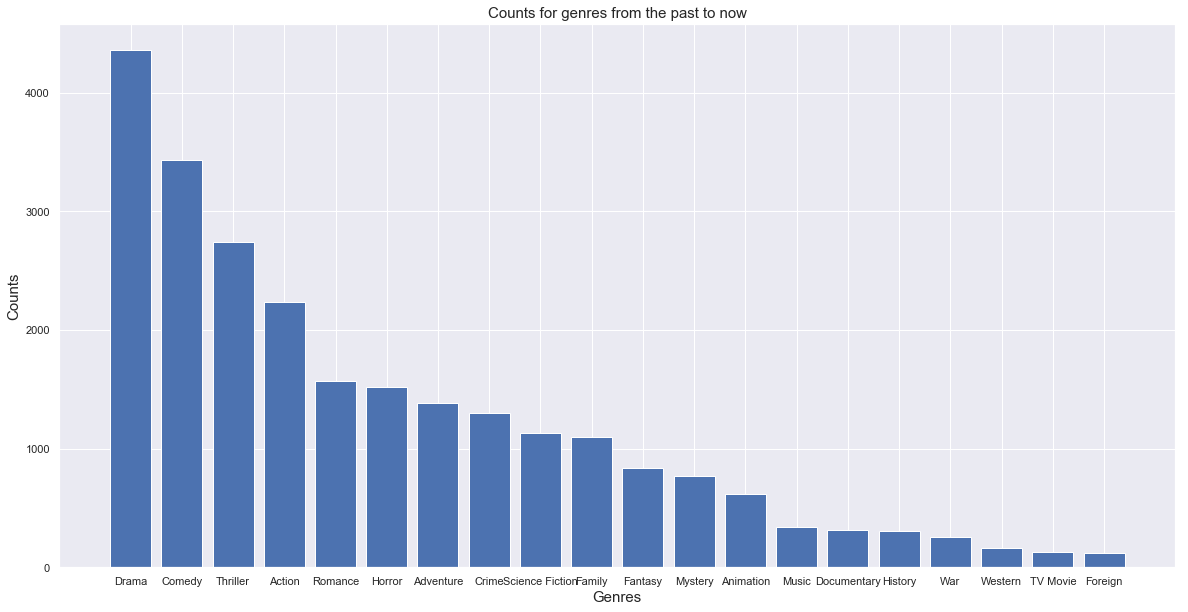

In [35]:
fig, ax = plt.subplots(figsize = (20, 10))
ax.bar(genres_count.index, genres_count)
ax.set_title('Counts for genres from the past to now', fontsize = 15)
ax.set_xlabel('Genres', fontsize = 15)
ax.set_ylabel('Counts', fontsize = 15);

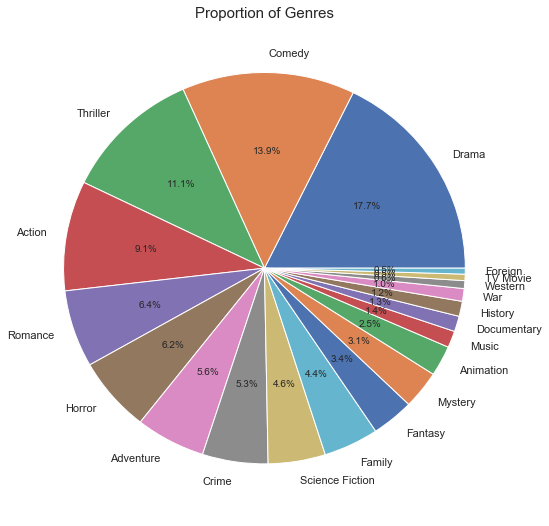

In [36]:
fig, ax = plt.subplots(figsize = (9, 9))
ax.pie(list(genres_prop.values), labels = list(genres_prop.index), autopct='%1.1f%%')
ax.set_title('Proportion of Genres', fontsize = 15);

In the previous two cells, I plot bar chart and pie chart to show the count and proportion of each genre.  
Top5 popular genres are **Drama, Comedy, Thriller, Action and Romance**.

### Question 3: How was the total revenue change from year ?  
In the next cell, I am going to count total revenue(adjusted) by year.

In [37]:
revenue_year = tmdb_df.groupby(['release_year'])['revenue_adj'].sum()
revenue_year

release_year
1960    1.069117e+09
1961    2.463622e+09
1962    1.553996e+09
1963    1.334357e+09
1964    2.397193e+09
1965    3.170185e+09
1966    5.692623e+08
1967    4.823051e+09
1968    1.659601e+09
1969    1.450145e+09
1970    3.146413e+09
1971    2.180523e+09
1972    2.579801e+09
1973    6.011167e+09
1974    3.593282e+09
1975    3.879578e+09
1976    3.069212e+09
1977    7.845261e+09
1978    4.523967e+09
1979    5.062057e+09
1980    4.679946e+09
1981    4.255844e+09
1982    5.555204e+09
1983    5.051902e+09
1984    5.532077e+09
1985    5.829668e+09
1986    5.964374e+09
1987    6.644058e+09
1988    6.894237e+09
1989    9.085023e+09
1990    8.852987e+09
1991    7.535703e+09
1992    9.445598e+09
1993    1.049411e+10
1994    1.043177e+10
1995    1.308943e+10
1996    1.154417e+10
1997    1.447426e+10
1998    1.268653e+10
1999    1.486523e+10
2000    1.382667e+10
2001    1.645240e+10
2002    1.771871e+10
2003    1.793334e+10
2004    1.933404e+10
2005    1.842921e+10
2006    1.757874e+10


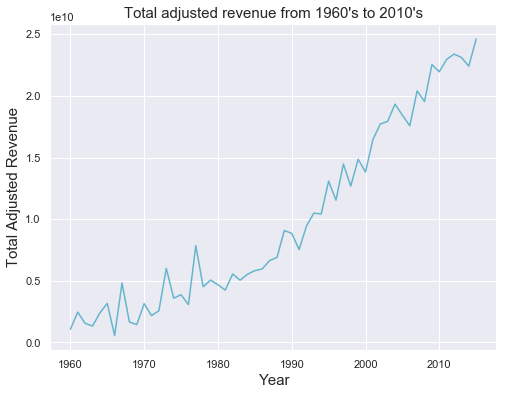

In [38]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(revenue_year.index, revenue_year.values, 'c')
ax.set_title("Total adjusted revenue from 1960's to 2010's", fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Total Adjusted Revenue', fontsize = 15);

In the previous cell, I plot a line chart to show the revenue trend from 1960's to 2010's.  
Between 1960 to 1980, revenue increased slowly and volatility of revenue is high. After 1980, revenue increased faster than past and volatility of revenue is low. From past to now, long-term revenue is increasing. 

### Question 4: For the Top3 production companies (who produced the most movies), how was its revenue trend from year to year ? And how many movies did they produce each year ?
I am going to use the dataframe `production_df` to answer this question.  
First, count how many times does each production company appears to see how many movies does each company producted from 1960's. Then find the top3 production companies.

In [39]:
top3_company = list(production_df['production_companies'].value_counts()[:3].index)
top3_company

['Universal Pictures', 'Warner Bros.', 'Paramount Pictures']

According to the result, the top3 production companies are **Universal Pictures**, **Warner Bros.** and **Paramount Pictures**.  
In the next cell, I am gonig to create three seperate dataframe for top3 production companies. They are `up_df`, `wb_df` and `pp_df`.

In [40]:
up_df = production_df.query('production_companies == "Universal Pictures"')
wb_df = production_df.query('production_companies == "Warner Bros."')
pp_df = production_df.query('production_companies == "Paramount Pictures"')

In the following three cells are used to check if there are only one production company which I need in the dataframe `up_df`, `wb_df` and `pp_df`.

In [41]:
up_df['production_companies'].unique()

array(['Universal Pictures'], dtype=object)

In [42]:
wb_df['production_companies'].unique()

array(['Warner Bros.'], dtype=object)

In [43]:
pp_df['production_companies'].unique()

array(['Paramount Pictures'], dtype=object)

In the next three cells, I am going to count total revenue(adjusted) in each year.

In [44]:
# Universal Pictures
up = up_df.groupby(['release_year'], as_index = False)['revenue_adj'].sum()
up.head(2)

,release_year,revenue_adj
0,1962,9.464582e+07
1,1963,9.594148e+07


In [45]:
# Warner Bros.
wb = wb_df.groupby(['release_year'], as_index = False)['revenue_adj'].sum()
wb.head(2)

,release_year,revenue_adj
0,1960,0.0
1,1961,0.0


In [46]:
# Paramount Pictures
pp = pp_df.groupby(['release_year'], as_index = False)['revenue_adj'].sum()
pp.head(2)

,release_year,revenue_adj
0,1960,1.260777e+08
1,1961,0.000000e+00


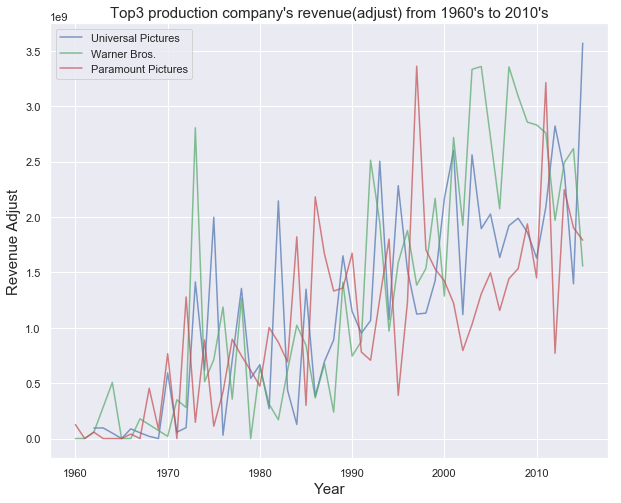

In [47]:
fig, ax = plt.subplots(figsize = (10, 8))
ax.plot(up['release_year'], up['revenue_adj'], 'b', alpha = .7, label = 'Universal Pictures')
ax.plot(wb['release_year'], wb['revenue_adj'], 'g', alpha = .7, label = 'Warner Bros.')
ax.plot(pp['release_year'], pp['revenue_adj'], 'r', alpha = .7, label = 'Paramount Pictures')
ax.set_title("Top3 production company's revenue(adjust) from 1960's to 2010's", fontsize = 15)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Revenue Adjust', fontsize = 15)
ax.legend(loc = 'upper left');

From the line chart, I find that the revenue is increasing from past to now, but the volatility is high in both three company.  
In the following, I am going to see how many movies did these top3 production companies produce every year. I will count the movie they produced each year and then plot a bar chart.

In [48]:
up_count = up_df.groupby(['release_year']).count()['revenue_adj']
wb_count = wb_df.groupby(['release_year']).count()['revenue_adj']
pp_count = pp_df.groupby(['release_year']).count()['revenue_adj']

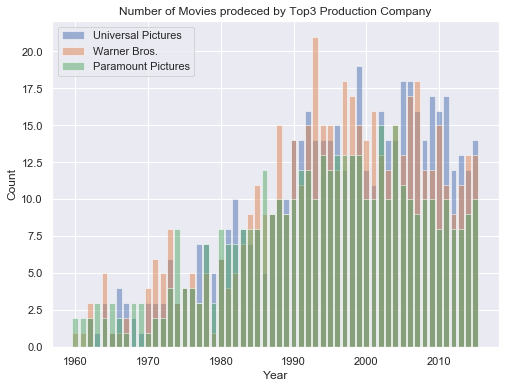

In [49]:
fix, ax = plt.subplots(figsize = (8,6))
ax.bar(up_count.index, up_count, alpha = .5, label = 'Universal Pictures')
ax.bar(wb_count.index, wb_count, alpha = .5, label = 'Warner Bros.')
ax.bar(pp_count.index, pp_count, alpha = .5, label = 'Paramount Pictures')
ax.set_title('Number of Movies prodeced by Top3 Production Company')
ax.set_xlabel('Year')
ax.set_ylabel('Count')
ax.legend(loc = 'upper left');

From the bar chart, I see after 1980 the number of movies in each company increased apparently. Before 2000, Warner Bros. and Paramount Pictures produced more movies than Universal Pictures in most years. But after 2000, Universal Pictures prodeced more movies than others.

### Question 5: Did the production company who produced more number of movies would has more revenue ?  
To answer this question, I will create a dataframe `production_edit` which contains production companies and the number of movies they produced and corresponding total revenue(adjusted).  
First create the dataframe `production_count` which contains the number of movies.

In [50]:
production_count = pd.DataFrame(production_df['production_companies'].value_counts())
production_count.reset_index(inplace = True)
production_count.columns = ['production_companies', 'count']
production_count.head()

,production_companies,count
0,Universal Pictures,522
1,Warner Bros.,509
2,Paramount Pictures,431
3,Twentieth Century Fox Film Corporation,282
4,Columbia Pictures,272


In the next cell, create the dataframe `production_revenue` which contains total revenue(adjusted) of each company.

In [51]:
production_revenue = production_df.groupby(['production_companies'], as_index = False).sum().sort_values(by = 'revenue_adj', ascending = False).iloc[:,[0,2]].reset_index(drop = True)
production_revenue.head()

,production_companies,revenue_adj
0,Warner Bros.,7.104849e+10
1,Universal Pictures,6.432196e+10
2,Paramount Pictures,5.746967e+10
3,Twentieth Century Fox Film Corporation,5.224729e+10
4,Walt Disney Pictures,3.738639e+10


Now, I am going to merge `production_count` and `production_revenue` as `production_edit`. And then plot the scatter plot.

In [52]:
production_edit = production_count.merge(production_revenue, on = 'production_companies')
production_edit.head(3)

,production_companies,count,revenue_adj
0,Universal Pictures,522,6.432196e+10
1,Warner Bros.,509,7.104849e+10
2,Paramount Pictures,431,5.746967e+10


Here, I define a function `scatter_plot` in order to plot scatter plot in the following analysis.

In [53]:
def scatter_plot(x, y, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize = (8, 6))
    ax.scatter(x, y, s = 15, c = 'b', marker = 'o')
    ax.set_title(title, fontsize = 15)
    ax.set_xlabel(xlabel, fontsize = 15)
    ax.set_ylabel(ylabel, fontsize = 15)
    return plt.show()

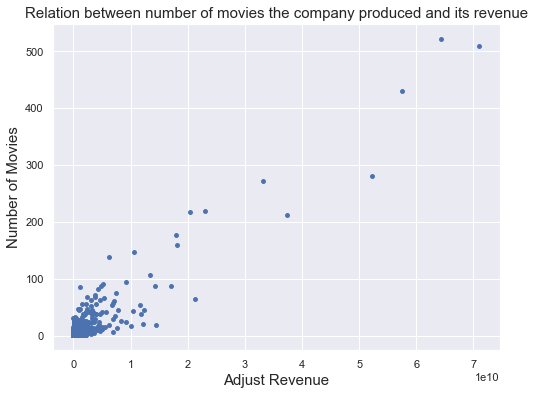

In [54]:
scatter_plot(production_edit['revenue_adj'], production_edit['count'], 'Relation between number of movies the company produced and its revenue', 'Adjust Revenue', 'Number of Movies')

From the scatter plot, it proves that the production company which produced more movies will have more revenue. Their correlation is positive.

### Question 6: Which actor/actress participated in many popular movies (Top10) ?  
My definition of popular movie is popularity greater than and equal to Third quantile(Q3). Here I will use dataframe `cast_df`.  
First, find the Q3 of the popularity.

In [55]:
q3 = cast_df['popularity'].describe()['75%']
q3

0.784114

The Q3 of popularity is 0.731945.  
Then use the function `query` in pandas to find the rows whose popularity greater than or equal to Q3 and keep top10 actor/actress.

In [56]:
cast_popular = cast_df.query('popularity >= {}'.format(q3))['cast'].value_counts()[:10]
cast_popular

Robert De Niro           40
Nicolas Cage             32
Bruce Willis             31
Samuel L. Jackson        29
Johnny Depp              29
Brad Pitt                28
Tom Cruise               27
Tom Hanks                26
Jason Statham            26
Arnold Schwarzenegger    26
Name: cast, dtype: int64

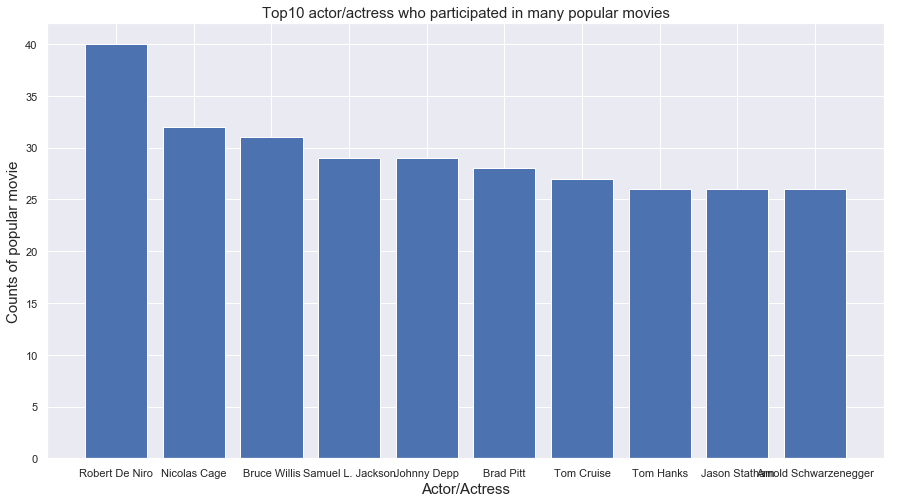

In [57]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(cast_popular.index, cast_popular)
ax.set_title('Top10 actor/actress who participated in many popular movies', fontsize = 15)
ax.set_xlabel('Actor/Actress', fontsize = 15)
ax.set_ylabel('Counts of popular movie', fontsize = 15);

From previous cells, I know the top10 actor/actress are Robert De Niro, Samuel L. Jackson, Bruce Willis, Nicolas Cage, Brad Pitt, Johnny Depp, Tom Cruise, Matt Damon, Jason Statham, Arnold Schwarzenegger. According to bar chart, I see Robert De Niro participated in more popular movies than other actor.  
Through this result, I find the top10 actors are male, there are no femal in it. Hence, if in the dataframe can indicate the casts who are male and who are female I think I can answer this question by gender, and it will give more information.

### Question 7: What kinds of properties are associated with movies that have high revenues ?  
To answer this question, I will use adjusted revenue and adjusted budget.  
I will plot scatter plot for budget_adj, vote_average, vote_count, runtime and revenue.

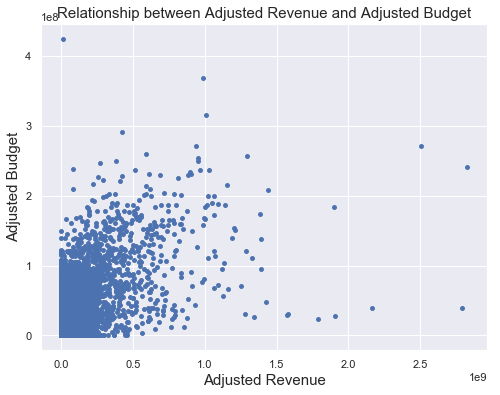

In [58]:
# revenue and budget (adjust)
scatter_plot(tmdb_df['revenue_adj'], tmdb_df['budget_adj'], 'Relationship between Adjusted Revenue and Adjusted Budget', 'Adjusted Revenue', 'Adjusted Budget')

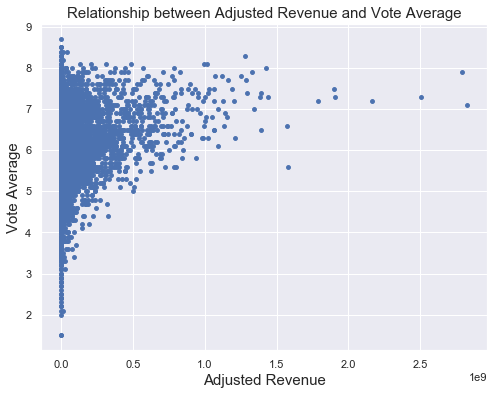

In [59]:
# vote_average and revenue
scatter_plot(tmdb_df['revenue_adj'], tmdb_df['vote_average'], 'Relationship between Adjusted Revenue and Vote Average', 'Adjusted Revenue', 'Vote Average')

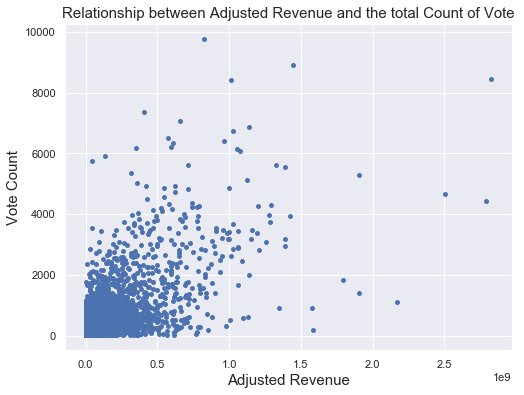

In [60]:
# vote_count and revenue
scatter_plot(tmdb_df['revenue_adj'], tmdb_df['vote_count'], 'Relationship between Adjusted Revenue and the total Count of Vote', 'Adjusted Revenue', 'Vote Count')

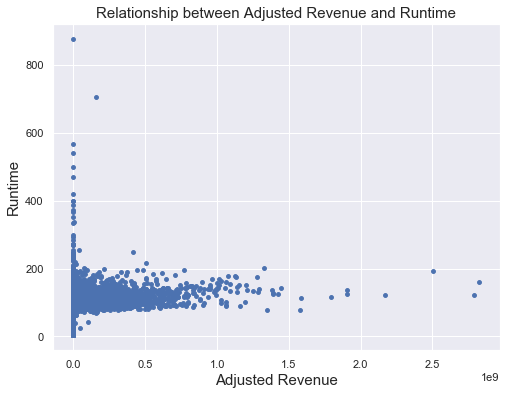

In [61]:
# runtime and revenue
scatter_plot(tmdb_df['revenue_adj'], tmdb_df['runtime'], 'Relationship between Adjusted Revenue and Runtime', 'Adjusted Revenue', 'Runtime')

From the scatter plot in the previous cells, I observe:
1. The correlation between budget and revenue is positve.
2. There's no significant relation between vote_average and revenue. The vote_average between 6 to 8 has higher revenue.
3. The correlation between count of vote(vote_count) and revenue is positive.
4. There's no significant relation between runtime and revenue.

<a id='conclusions'></a>
## Conclusions
  
In conclusiion, the top5 genres are drama, comedy, thriller, action and romance and drama is the most popular genres. The revenue increased from past to now, I think film industry is more prosperous nowadays maybe the one of reasons. For the top3 production companies, their revenue and the number of movies they prodeced are both increasing. finally, production companies may have great interest in what factors are associated with high revenue. I can tell them from only scatter plot so far, the factors are budget and the number of vote.